In [2]:
# Download all the necessay libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)



### Title of Project: Optimizing Dry Bean Sorting Efficiency with Automated Image Classification Techniques

In [3]:

# Read dataset

url <- "https://github.com/NaziaNadir/dsci-100-2023-007-group-8/raw/main/Dry_Bean_Dataset.csv"
BeanData <- read_csv(url)

# remove missing values if any
BeanData <- filter(BeanData, rowSums(is.na(BeanData)) != ncol(BeanData))




Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (16): Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Spliting the data into training and testing set

In [5]:

#Set the seed. Don't remove this!
set.seed(3456) 

# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of bean Classes in the dataset.

bean_split <- initial_split(BeanData, prop = 0.5, strata = Class)  
bean_train <- training(bean_split)   
bean_test <- testing(bean_split) # wont touch it until the best classifier is obtained

# your code here
bean_train
bean_test




Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
47794,833.459,279.6546,217.9186,1.283298,0.6267232,48528,246.6844,0.7381313,0.9848747,0.8645991,0.8821041,0.005851248,0.002185283,0.7781077,0.9985444,BARBUNYA
47981,809.088,291.6540,210.0432,1.388543,0.6937880,48451,247.1666,0.7697775,0.9902995,0.9210594,0.8474651,0.006078530,0.001934041,0.7181971,0.9972476,BARBUNYA
49317,886.931,310.5631,202.4589,1.533956,0.7582971,50400,250.5840,0.7130856,0.9785119,0.7878197,0.8068700,0.006297282,0.001646445,0.6510392,0.9986656,BARBUNYA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57790,920.668,360.9603,204.7025,1.763341,0.8236453,58342,271.2573,0.7359815,0.9905385,0.8567546,0.7514878,0.006246069,0.001228780,0.5647338,0.9958183,SIRA
57944,921.449,353.8206,210.4090,1.681585,0.8039647,59041,271.6185,0.6863532,0.9814197,0.8575821,0.7676727,0.006106252,0.001308154,0.5893215,0.9909941,SIRA
58074,910.115,351.9589,210.4178,1.672667,0.8016096,58609,271.9230,0.7776483,0.9908717,0.8810470,0.7725988,0.006060524,0.001332006,0.5969089,0.9984295,SIRA


Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
28395,610.291,208.1781,173.8887,1.197191,0.5498122,28715,190.1411,0.7639225,0.9888560,0.9580271,0.9133578,0.007331506,0.003147289,0.8342224,0.9987239,SEKER
28734,638.018,200.5248,182.7344,1.097356,0.4117853,29172,191.2728,0.7839681,0.9849856,0.8870336,0.9538608,0.006978659,0.003563624,0.9098505,0.9984303,SEKER
30279,634.927,212.5606,181.5102,1.171067,0.5204007,30600,196.3477,0.7756885,0.9895098,0.9438518,0.9237260,0.007020065,0.003152779,0.8532696,0.9992358,SEKER
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
42042,771.515,288.0827,186.3471,1.545947,0.7626149,42476,231.3645,0.8162544,0.9897825,0.8875738,0.8031185,0.006852259,0.001758458,0.6449992,0.9971345,DERMASON
42049,770.185,290.1634,185.0517,1.568013,0.7702435,42503,231.3838,0.7560050,0.9893184,0.8907902,0.7974258,0.006900602,0.001721186,0.6358878,0.9970802,DERMASON
42139,759.321,281.5399,191.1880,1.472582,0.7340648,42569,231.6313,0.7299324,0.9898988,0.9184241,0.8227297,0.006681220,0.001888271,0.6768842,0.9967673,DERMASON


# Variable Selection

Use of histograms to look at the distribtion of each variable
The variables with high overlapping are removed while the varibales with distinct classes are taken

Warning message:
“Ignoring unknown parameters: bindwidth”


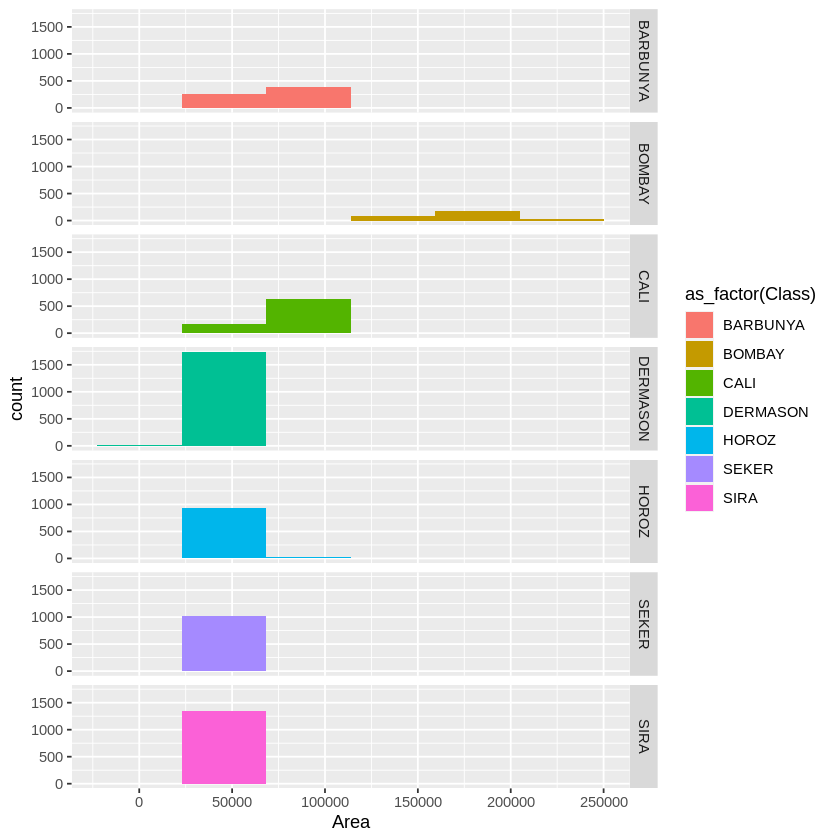

In [11]:
bean_area <- bean_train|>
 ggplot( aes(x = Area, fill = as_factor(Class))) +
  geom_histogram( bins = 6, bindwidth = 0.1) +
  facet_grid(rows = vars(Class)) 

bean_area


The distribution is sistinct and therefore taken

In [12]:
bean_Perimeter <- bean_train|>
 ggplot( aes(x = Perimeter, fill = as_factor(Class))) +
  geom_histogram (bins = 6) +
  facet_grid(rows = vars(Class)) 

bean_MajorAxisLength<- bean_train|>
 ggplot( aes(x = MajorAxisLength, fill = as_factor(Class))) +
  geom_histogram() +
  facet_grid(rows = vars(Class)) 

bean_MinorrAxisLength <- bean_train|>
 ggplot( aes(x = MinorAxisLength, fill = as_factor(Class))) +
  geom_histogram() +
  facet_grid(rows = vars(Class)) 

bean_AspectRation<- bean_train|>
 ggplot( aes(x = AspectRation, fill = as_factor(Class))) +
  geom_histogram(bins = 6) +
  facet_grid(rows = vars(Class)) 

bean_Eccentricity <- bean_train|>
 ggplot( aes(x = Eccentricity, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 6) +
  facet_grid(rows = vars(Class)) 


bean_ConvexArea <- bean_train|>
 ggplot( aes(x = ConvexArea, fill = as_factor(Class))) +
  geom_histogram(bins = 6) +
  facet_grid(rows = vars(Class)) 


bean_EquivDiameter <- bean_train|>
 ggplot( aes(x = EquivDiameter, fill = as_factor(Class))) +
  geom_histogram(bins = 6) +
  facet_grid(rows = vars(Class)) 



bean_Extent <- bean_train|>
 ggplot( aes(x = Extent, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_Solidity <- bean_train|>
 ggplot( aes(x = Solidity, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_roundness <- bean_train|>
 ggplot( aes(x = roundness, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_Compactness <- bean_train|>
 ggplot( aes(x = Compactness, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 60) +
  facet_grid(rows = vars(Class)) 


bean_ShapeFactor1 <- bean_train|>
 ggplot( aes(x = ShapeFactor1, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_ShapeFactor2 <- bean_train|>
 ggplot( aes(x = ShapeFactor2, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_ShapeFactor3<- bean_train|>
 ggplot( aes(x = ShapeFactor3, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class)) 


bean_ShapeFactor4<- bean_train|>
 ggplot( aes(x = ShapeFactor4, fill = as_factor(Class))) +
  geom_histogram(binwidth =  0.1, bins = 30) +
  facet_grid(rows = vars(Class))

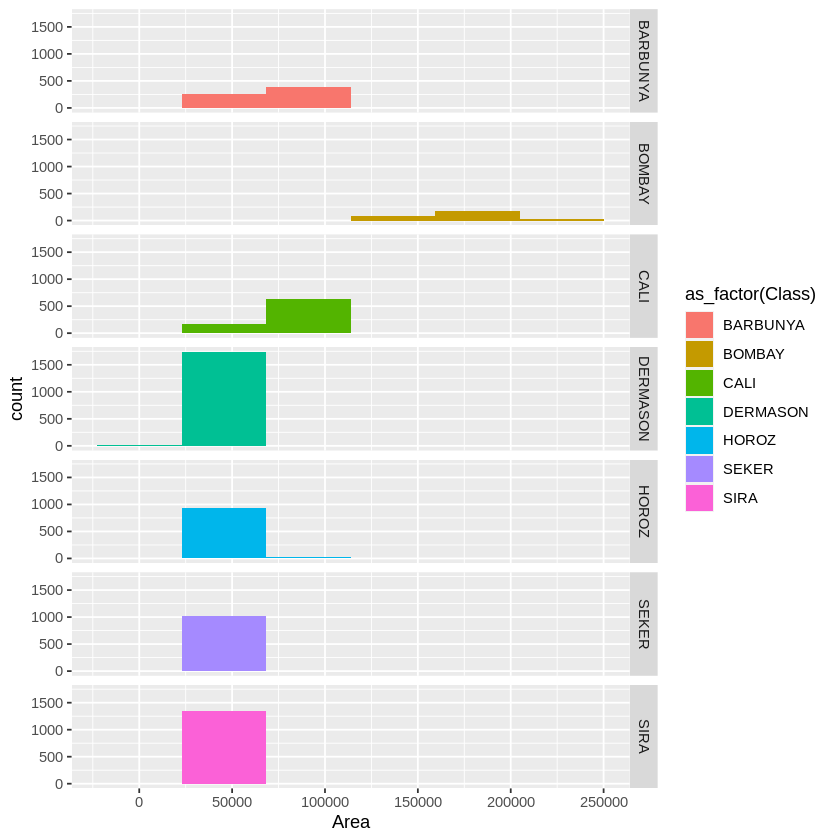

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



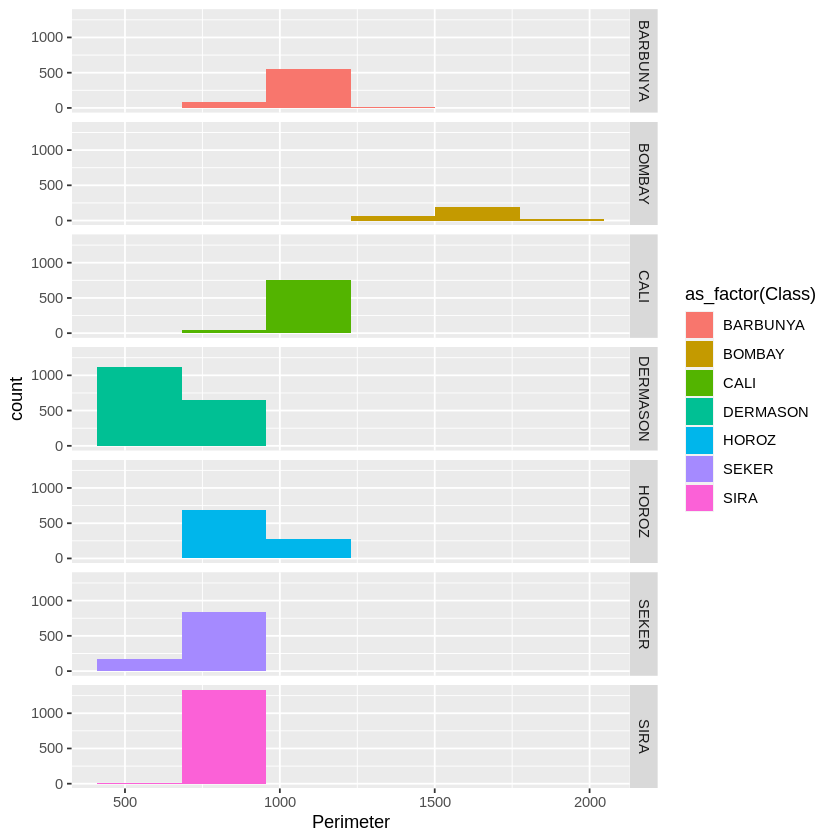

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



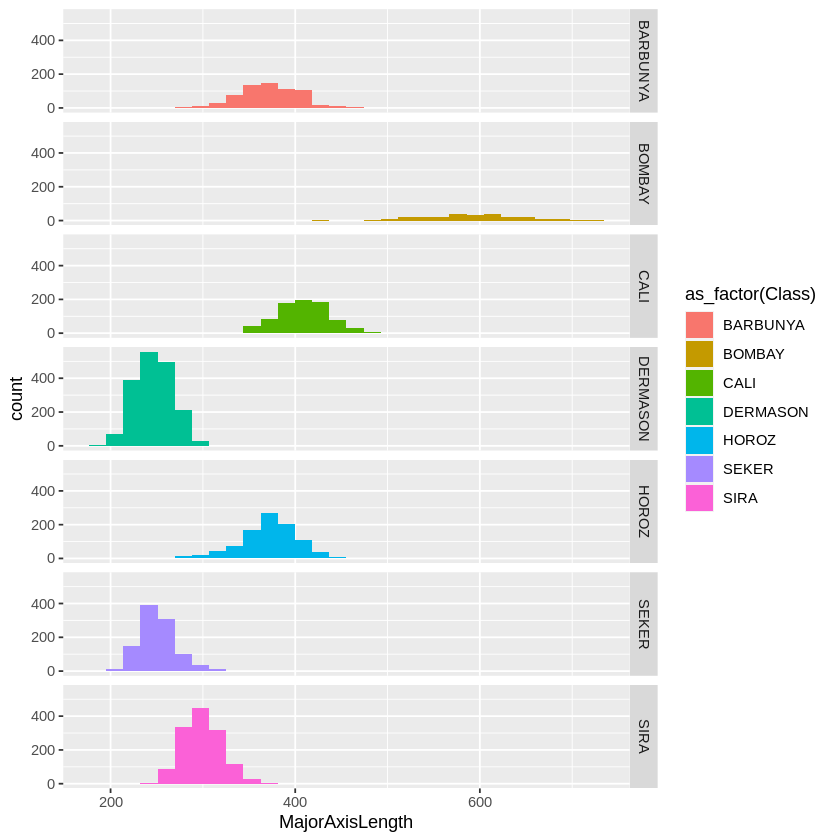

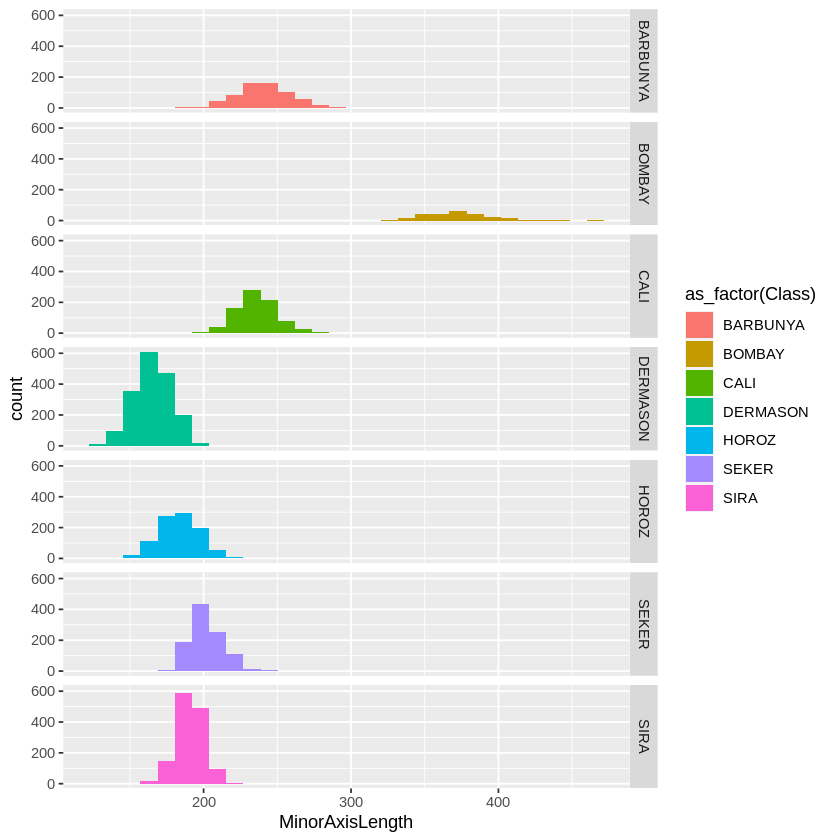

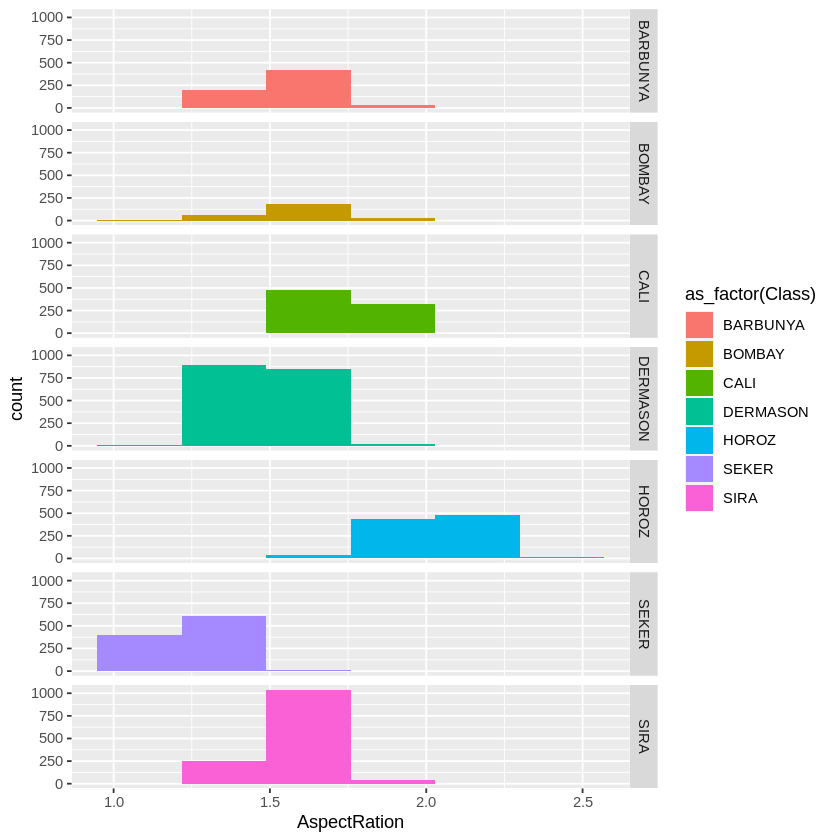

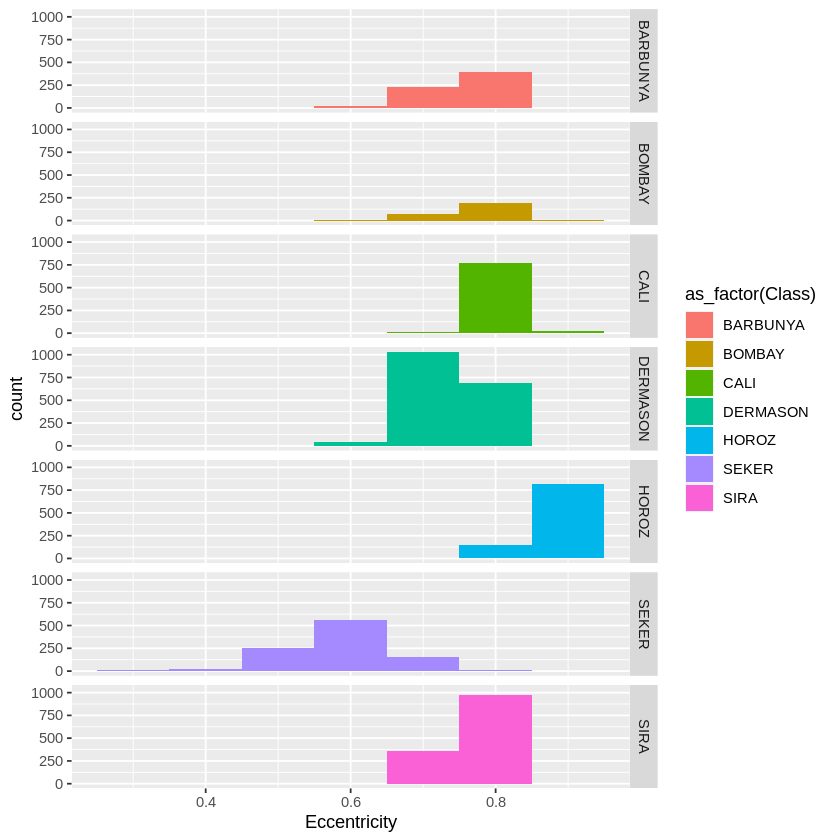

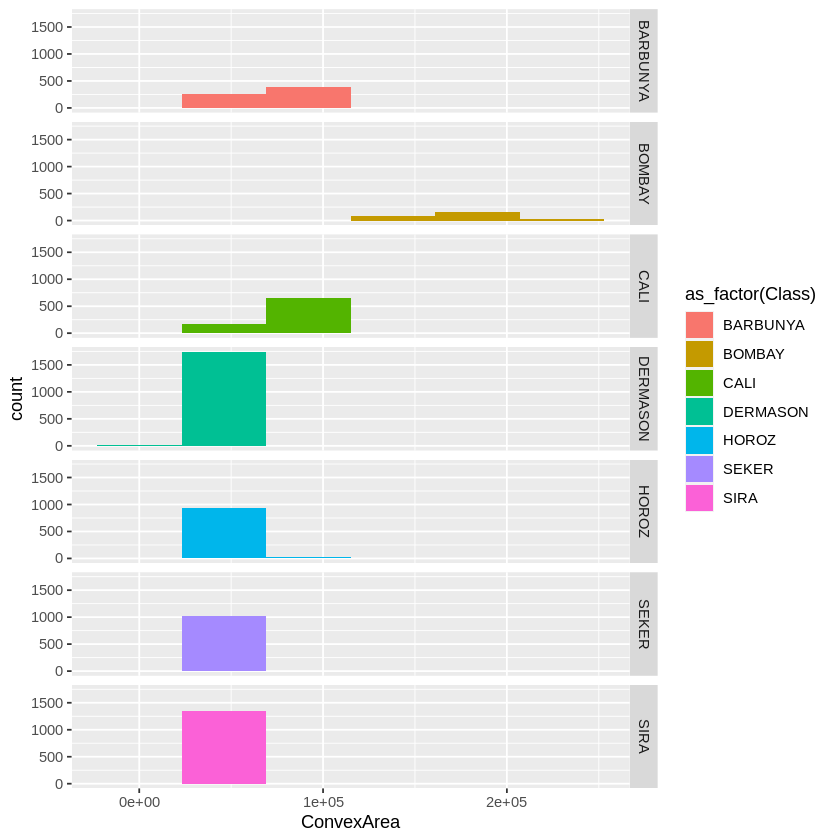

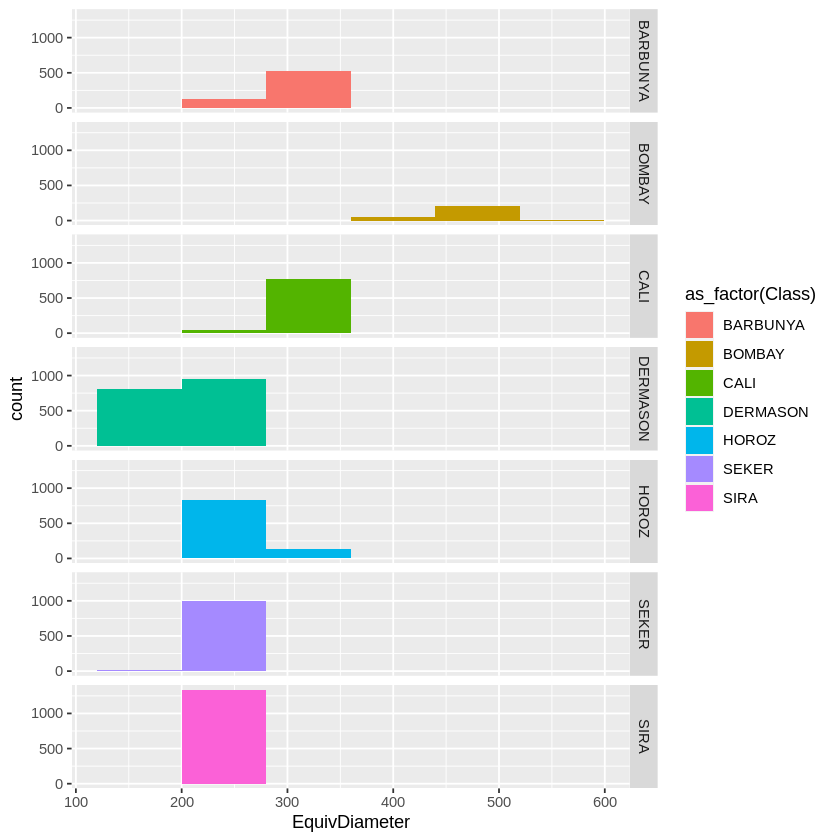

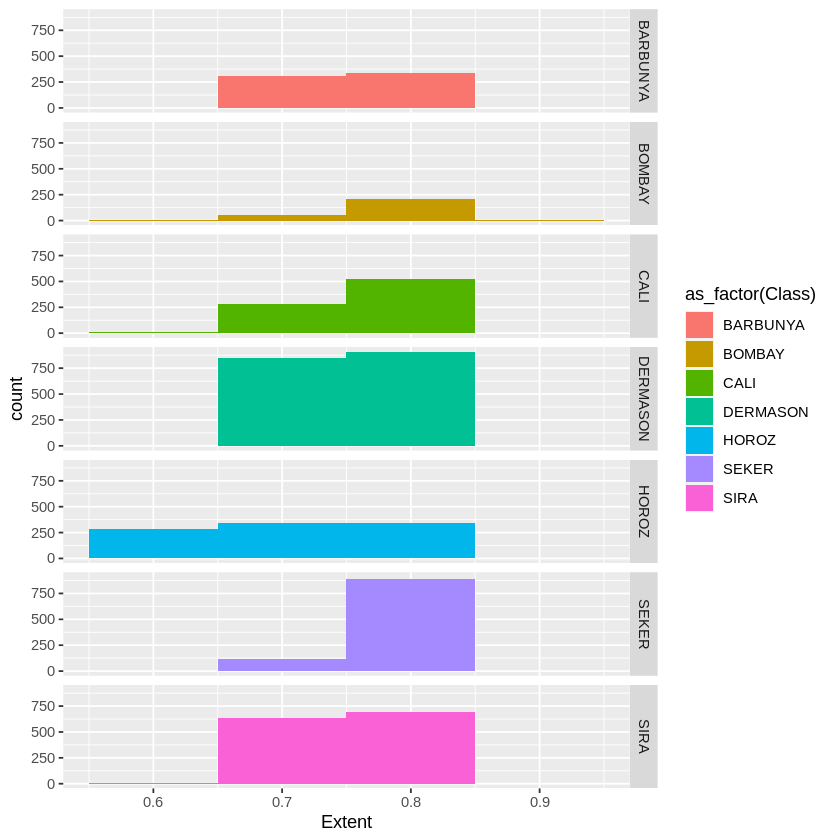

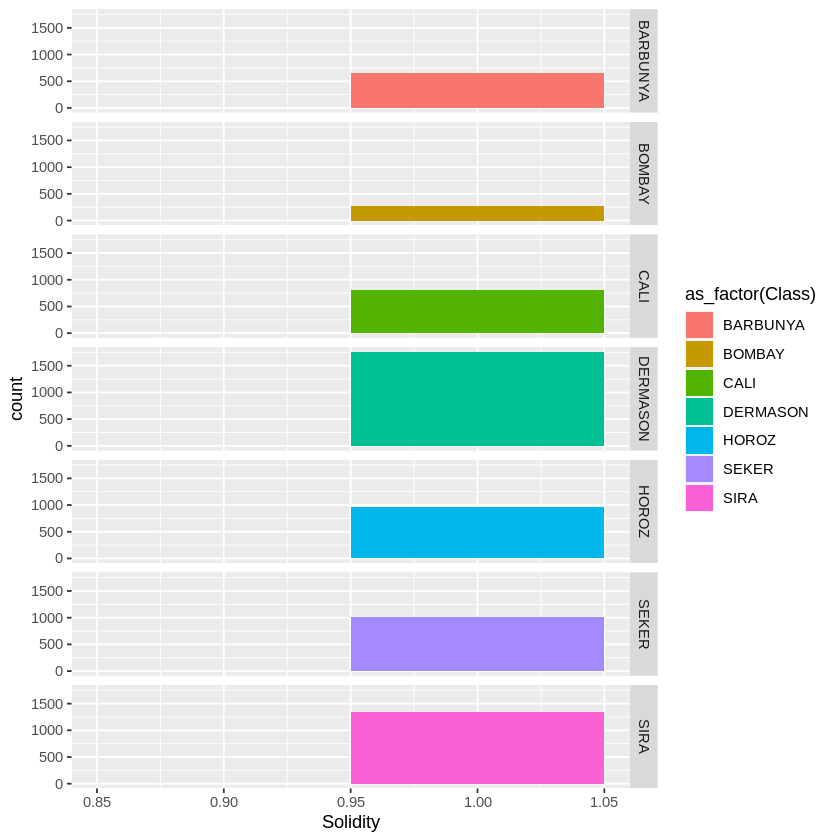

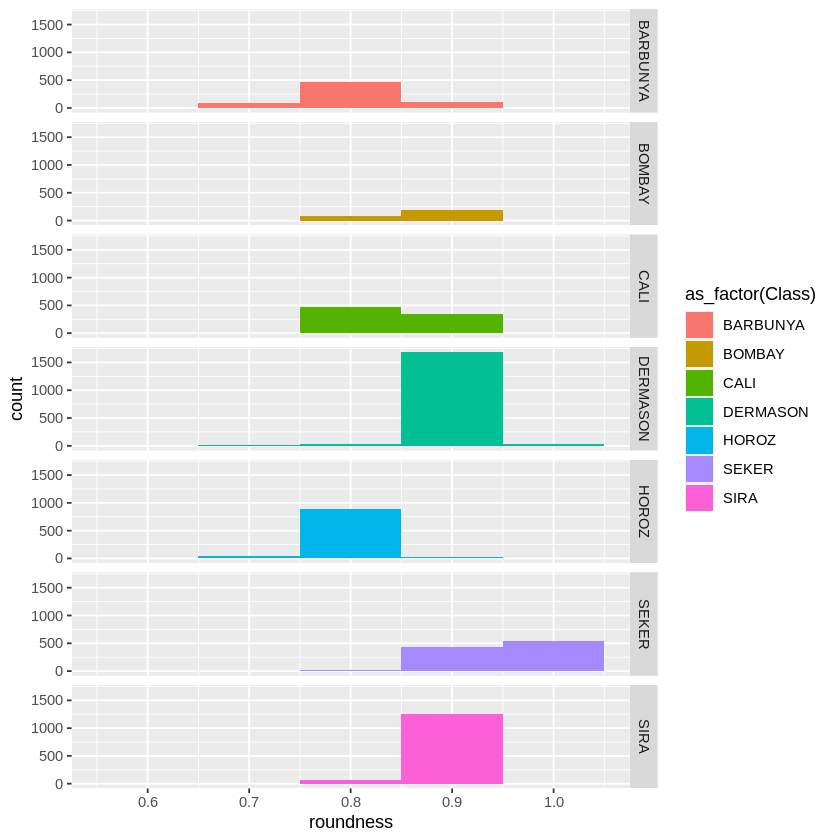

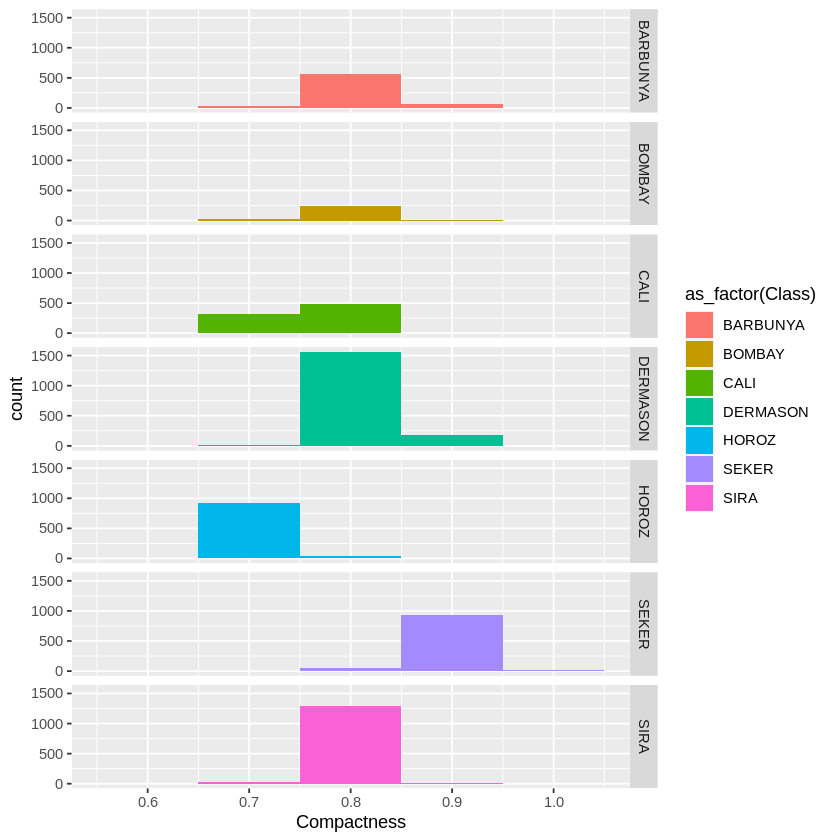

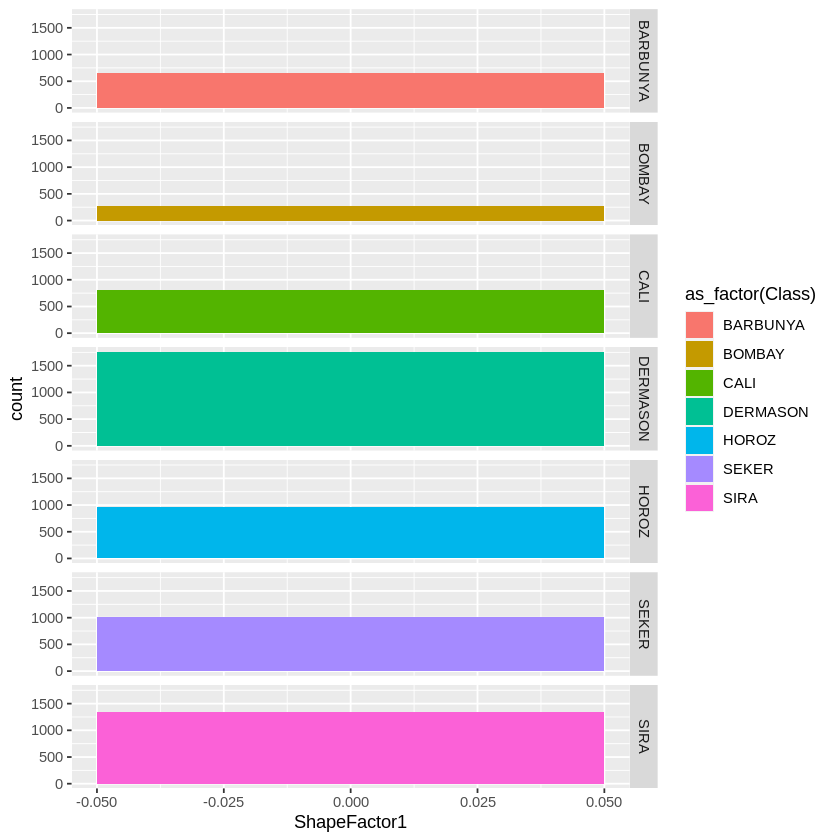

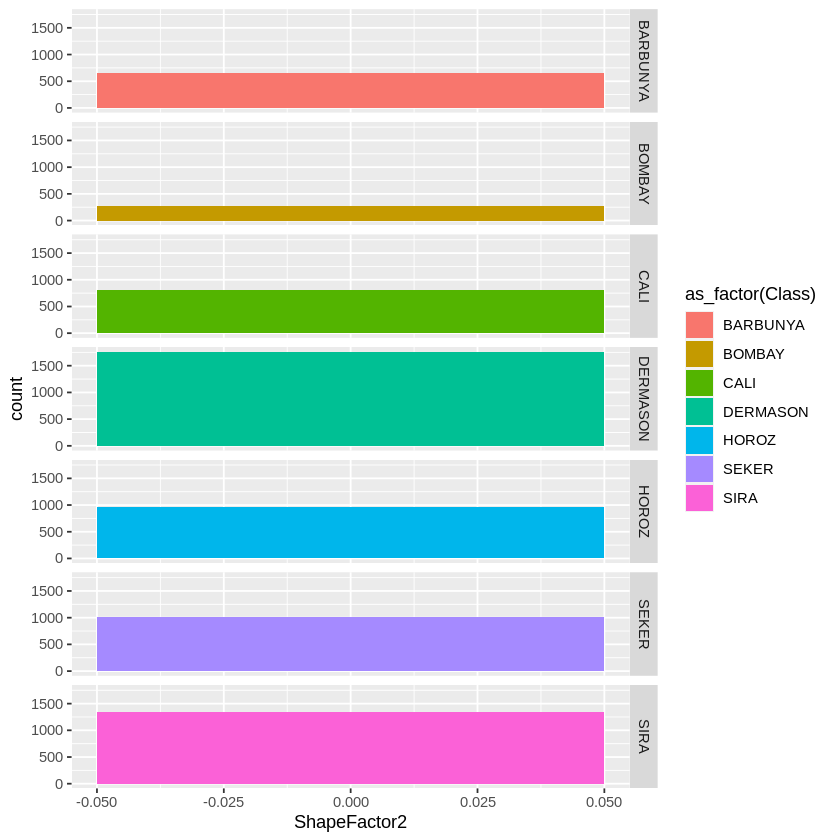

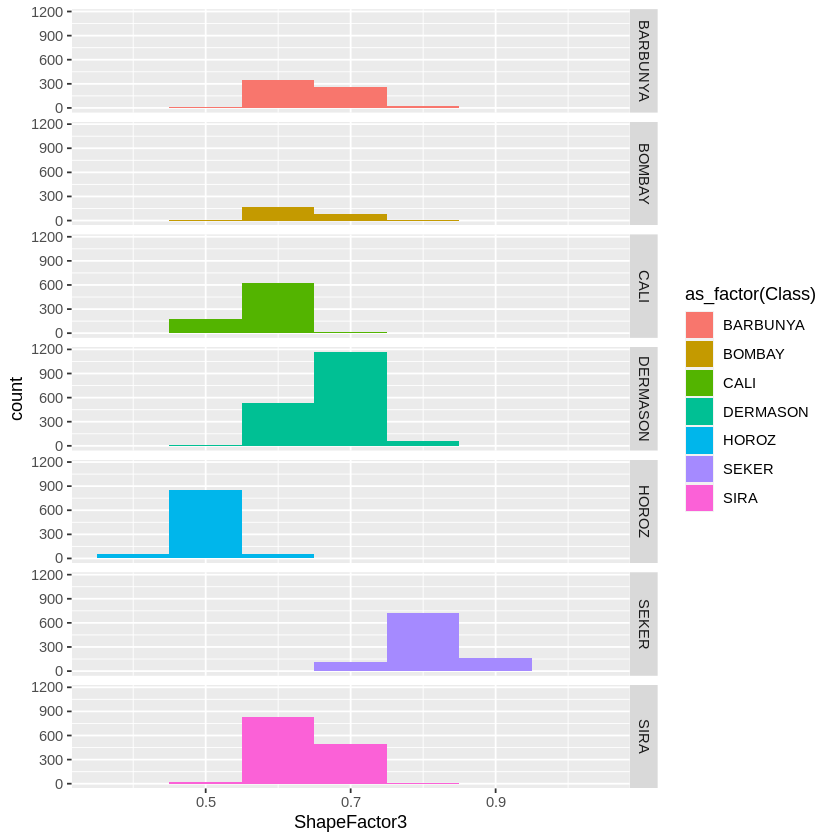

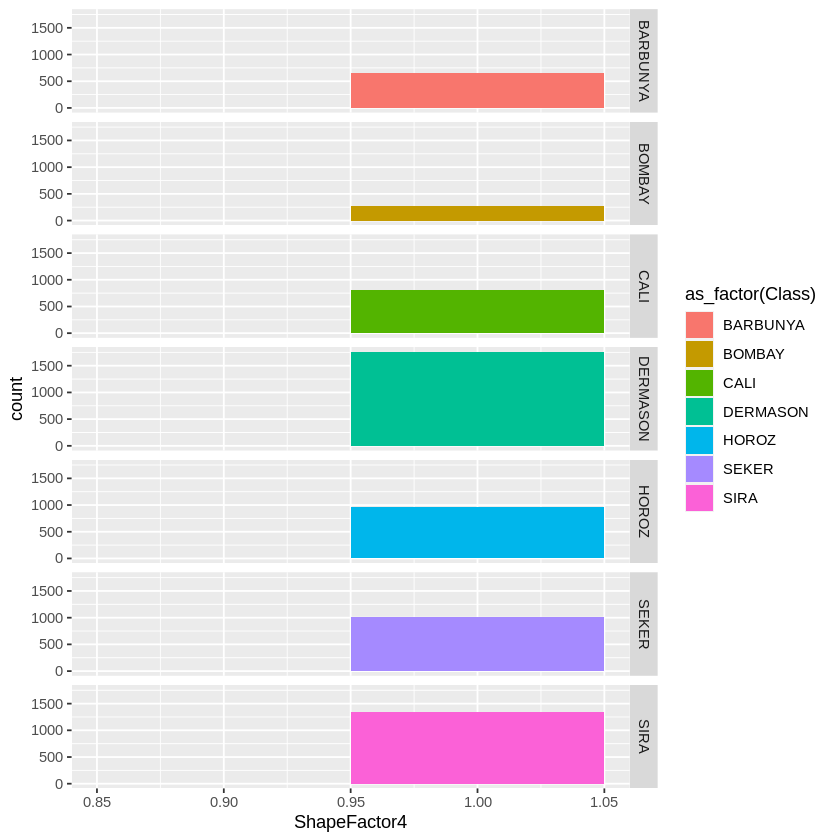

In [13]:
bean_area
bean_Perimeter
bean_MajorAxisLength
bean_MinorrAxisLength
bean_AspectRation
bean_Eccentricity
bean_ConvexArea
bean_EquivDiameter
bean_Extent
bean_Solidity
bean_roundness
bean_Compactness
bean_ShapeFactor1
bean_ShapeFactor2
bean_ShapeFactor3
bean_ShapeFactor4

 By observing the above histograms, we choose Area,Perimeter,AspectRation,Eccentricity,EquivDiameter,roundness,Compactness,ShapeFactor3 as variables as they have distinct values for classes .

Choosing the required variables by using select function

In [14]:
bean_new_train <- bean_train|>
select(Perimeter,AspectRation,Eccentricity,EquivDiameter,roundness,Compactness, Class)
bean_new_train

Perimeter,AspectRation,Eccentricity,EquivDiameter,roundness,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
833.459,1.283298,0.6267232,246.6844,0.8645991,0.8821041,BARBUNYA
809.088,1.388543,0.6937880,247.1666,0.9210594,0.8474651,BARBUNYA
886.931,1.533956,0.7582971,250.5840,0.7878197,0.8068700,BARBUNYA
⋮,⋮,⋮,⋮,⋮,⋮,⋮
920.668,1.763341,0.8236453,271.2573,0.8567546,0.7514878,SIRA
921.449,1.681585,0.8039647,271.6185,0.8575821,0.7676727,SIRA
910.115,1.672667,0.8016096,271.9230,0.8810470,0.7725988,SIRA


The data set has 7 classes and 8 variables to work on

Splitting of data set into trianing and testing

looking the percentage of each data set

# Forward selection

In [ ]:

# # select all columns (possible predictors) except Class
# names <- colnames(bean_new_train |> select (-Class))

# # Make model formula for all predictors
# model_formula <- paste("Class", "~", paste(names, collapse="+"))
# model_formula 

# # create an empty tibble to store the results
# accuracies <- tibble(size = integer(), 
#                      model_string = character(), 
#                      accuracy = numeric())

# # create a model specification
# knn_spec <- nearest_neighbor(weight_func = "rectangular", 
#                              neighbors = tune()) |>
#      set_engine("kknn") |>
#      set_mode("classification")

# # create a 5-fold cross-validation object
# BeanData_vfold <- vfold_cv(bean_train, v = 5, strata = Class)

# # store the total number of predictors
# n_total <- length(names)

# # stores selected predictors
# selected <- c()

[1] "Class ~ Perimeter+AspectRation+Eccentricity+EquivDiameter+roundness+Compactness"

In [ ]:
# # for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
#     # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("Class", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         BeanData_recipe <- recipe(as.formula(model_string), 
#                                 data = bean_train) |>
#                           step_scale(all_predictors()) |>
#                           step_center(all_predictors())

#         # tune the KNN classifier with these predictors, 
#         # and collect the accuracy for the best K
#         acc <- workflow() |>
#           add_recipe( BeanData_recipe ) |>
#           add_model(knn_spec) |>
#           tune_grid(resamples = BeanData_vfold, grid = 10) |>
#           collect_metrics() |>
#           filter(.metric == "accuracy") |>
#           summarize(mx = max(mean))
#         acc <- acc$mx |> unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies |> 
#       add_row(size = i, 
#               model_string = models[[jstar]], 
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
# accuracies

In [12]:
#THIS CODE IS FOR FINDING THE OPTIMAL VALUE OF K FOR OUR SELECTED MODEL

set.seed(2020) # DO NOT REMOVE
# standarization recipe

bean_recipe <- recipe(Class ~., data = bean_new_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
      set_mode("classification")

# cross validation

bean_vfold <- vfold_cv(bean_train, v = 5, strata = Class)

# Assemble into workflow
knn_results <- workflow() |>
       add_recipe(bean_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = bean_vfold, grid = 10) |>
       collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8893797,5,0.005129744,Preprocessor1_Model1
1,roc_auc,hand_till,0.9431182,5,0.003510731,Preprocessor1_Model1
4,accuracy,multiclass,0.9117970,5,0.003439763,Preprocessor1_Model2
⋮,⋮,⋮,⋮,⋮,⋮,⋮
13,roc_auc,hand_till,0.9871306,5,0.001196470,Preprocessor1_Model8
14,accuracy,multiclass,0.9162142,5,0.005220970,Preprocessor1_Model9
14,roc_auc,hand_till,0.9873241,5,0.001301605,Preprocessor1_Model9


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8893797,5,0.005129744,Preprocessor1_Model1
4,accuracy,multiclass,0.9117970,5,0.003439763,Preprocessor1_Model2
6,accuracy,multiclass,0.9154795,5,0.005762400,Preprocessor1_Model3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
12,accuracy,multiclass,0.9158486,5,0.004550696,Preprocessor1_Model7
13,accuracy,multiclass,0.9165818,5,0.005348200,Preprocessor1_Model8
14,accuracy,multiclass,0.9162142,5,0.005220970,Preprocessor1_Model9


neighbors,mean
<int>,<dbl>
13,0.9165818
7,0.9165757
14,0.9162142
⋮,⋮
9,0.9143712
4,0.9117970
1,0.8893797


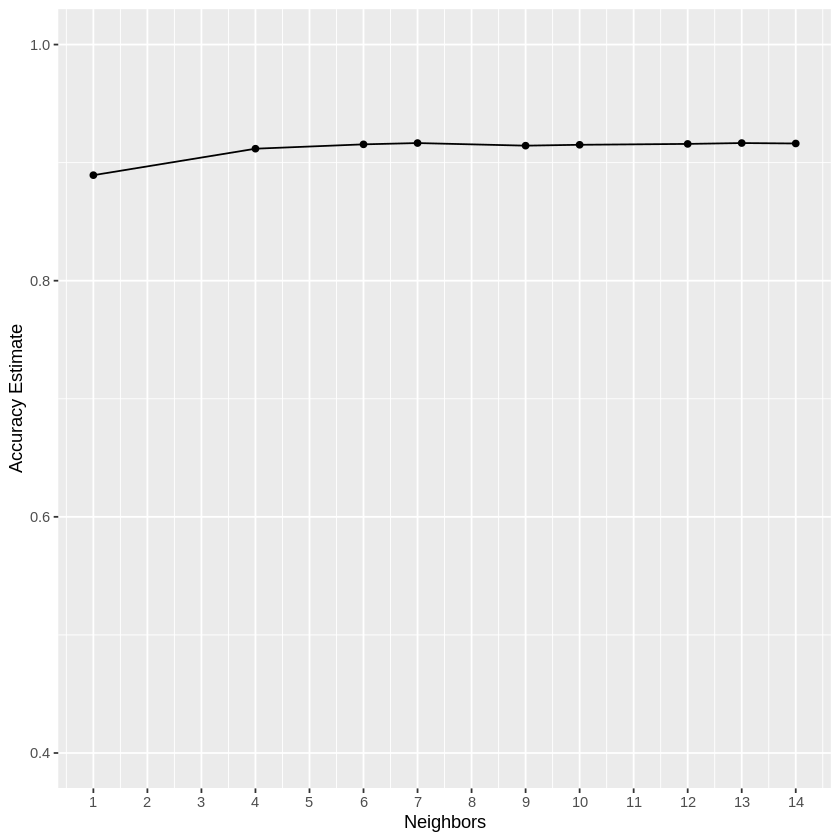

In [14]:
# THIS CODE IS FOR FINDING THE OPTIMAL VALUE OF K FOR OUR SELECTED MODEL
# find best value of number of K
accuracies <- knn_results |> 
       filter(.metric=="accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracies
accuracy_versus_k

# the highest accuracy is 91.3 and it is found at K=13
highest_accuracy <- accuracies|> select(neighbors, mean)|> arrange(desc(mean))
highest_accuracy

In [10]:
#Preliminary exploratory data analysis:
bean_count <- bean_data |>
                group_by(Class) |>
                summarise(count = n()) |>
                arrange(desc(count)) 
          

bean_count
visualization <- bean_count |>
ggplot(aes(x= count, fill = Class)) +
                geom_histogram(position = "identity") +
                facet_grid(rows = vars(count)) +
                binwidth = 30
visualization
# histograms visualize the distribution of one quantitative variable
# (i.e., all its possible values and how often they occur)


Class,count
<fct>,<int>
DERMASON,3546
SIRA,2636
SEKER,2027
⋮,⋮
CALI,1630
BARBUNYA,1322
BOMBAY,522


ERROR: Error in visualization <- ggplot(bean_count, aes(x = count, fill = Class)) + : object 'visualization' not found


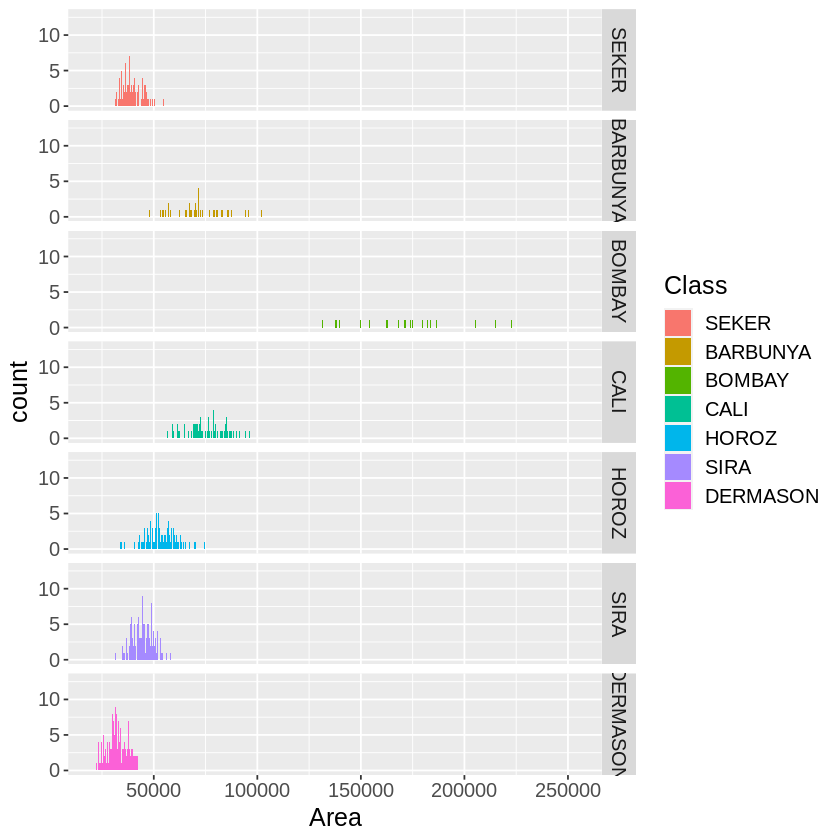

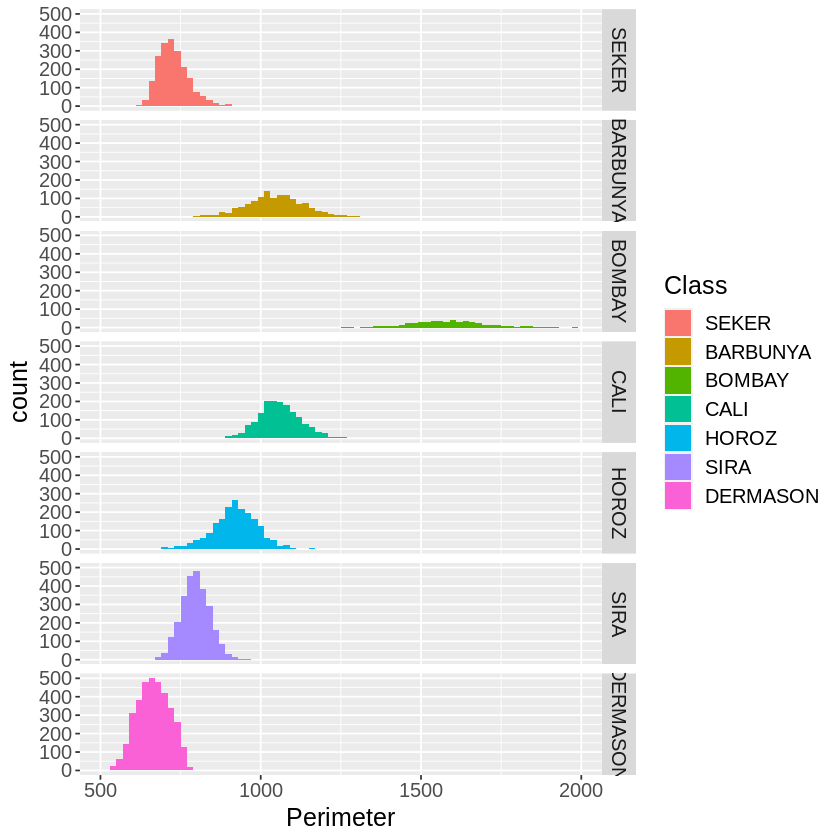

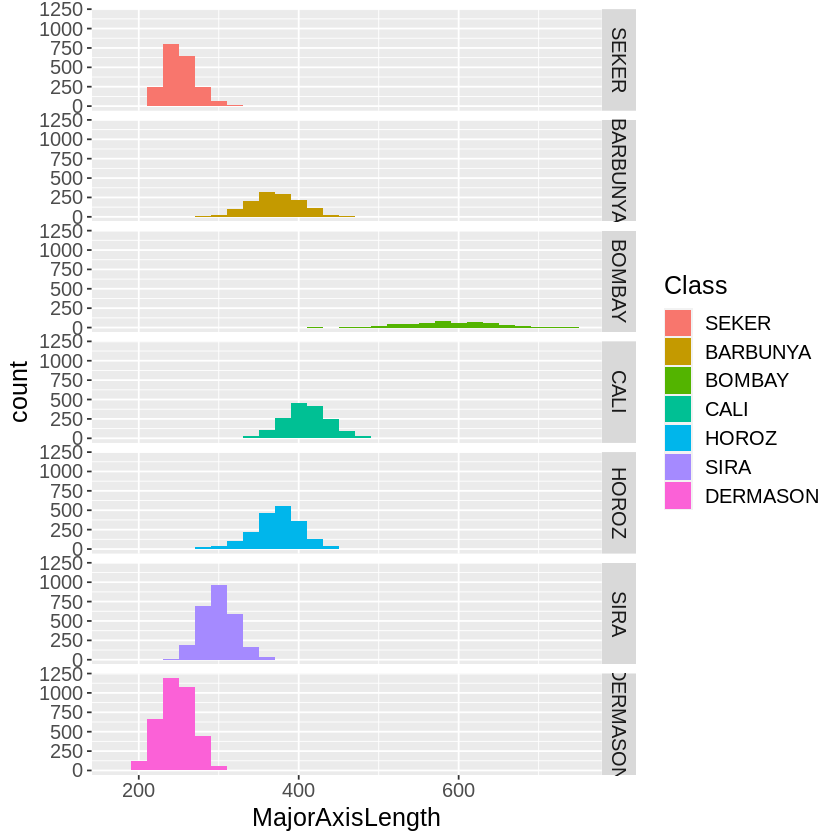

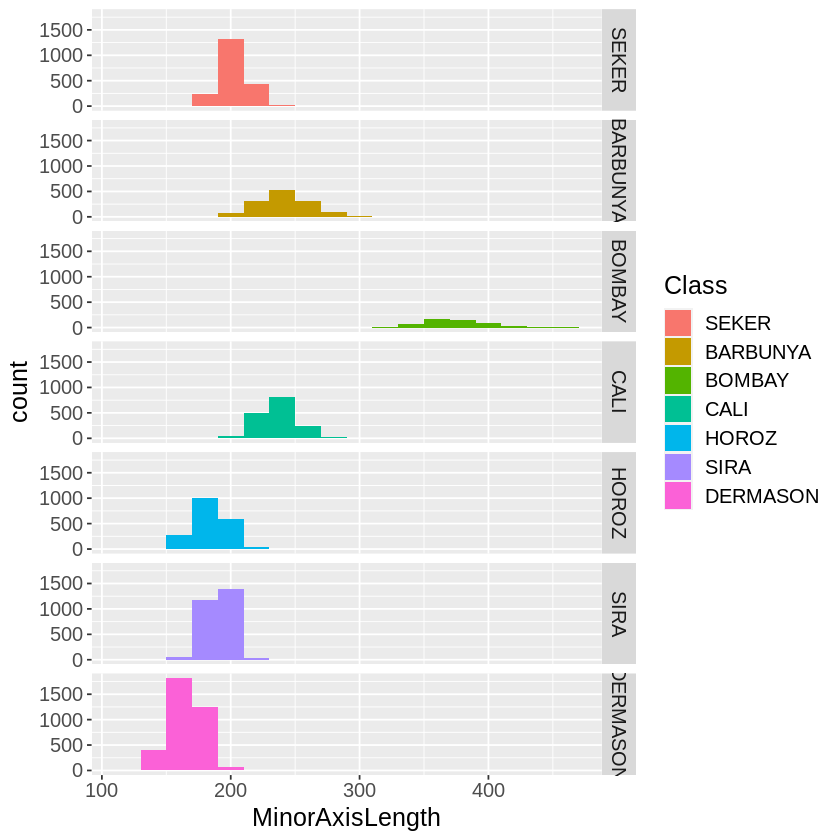

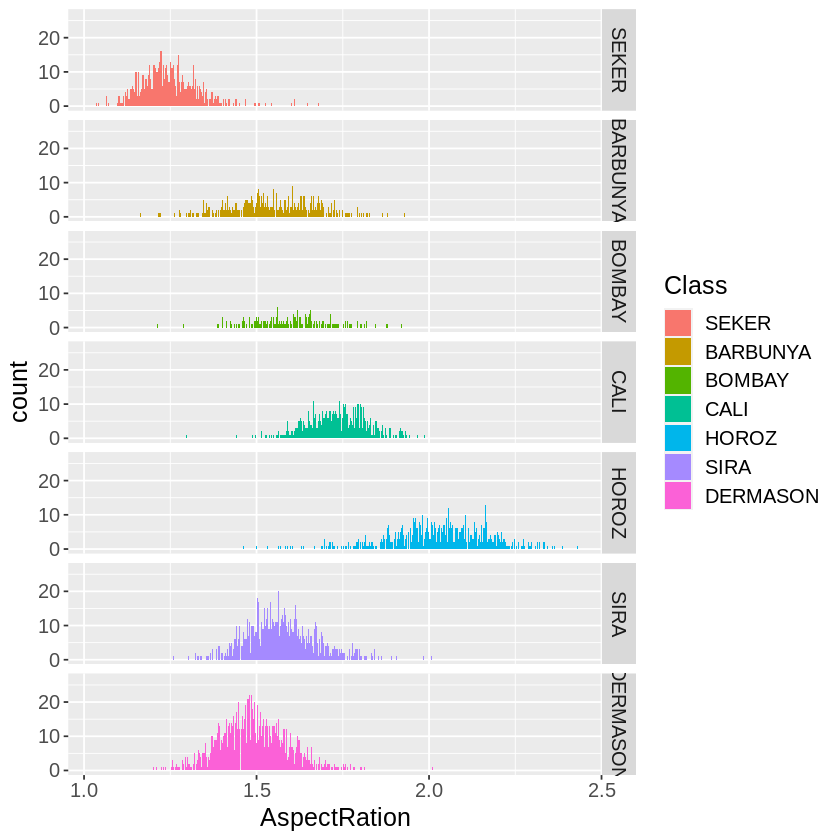

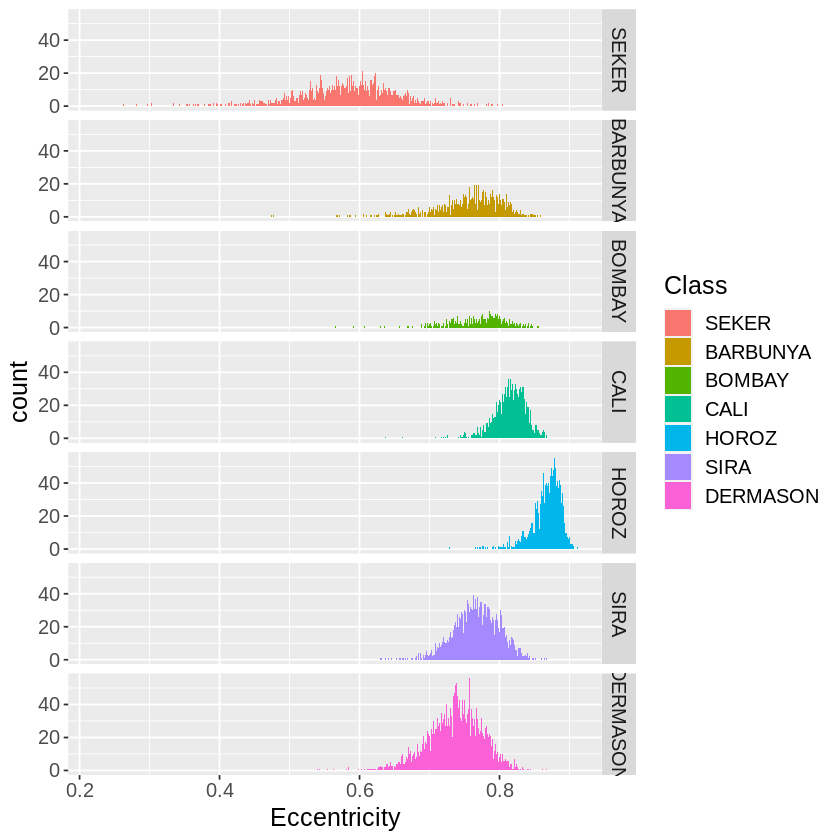

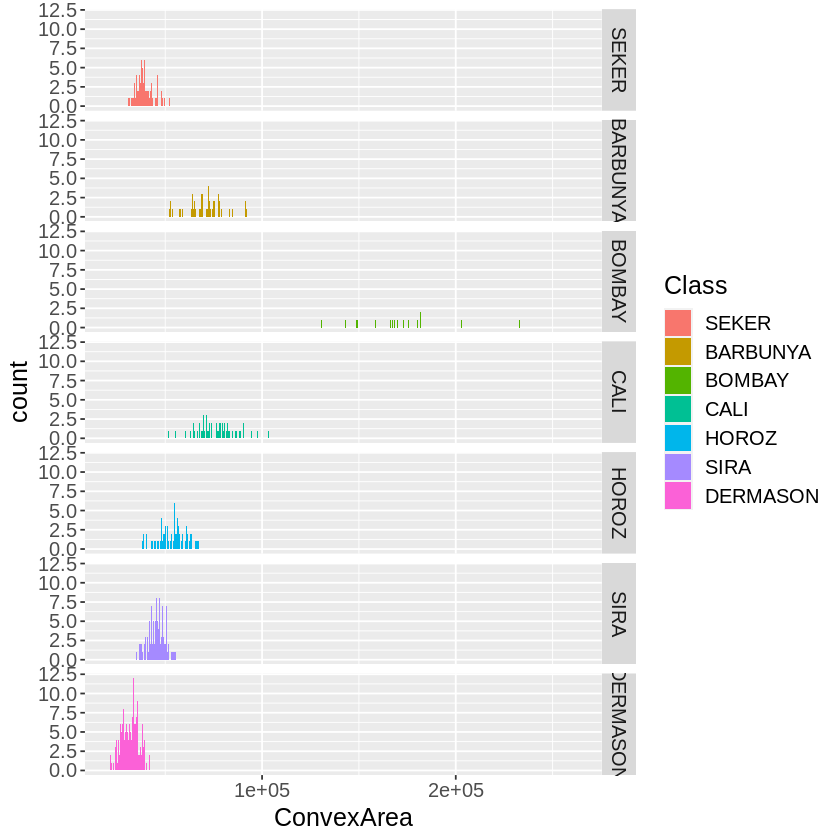

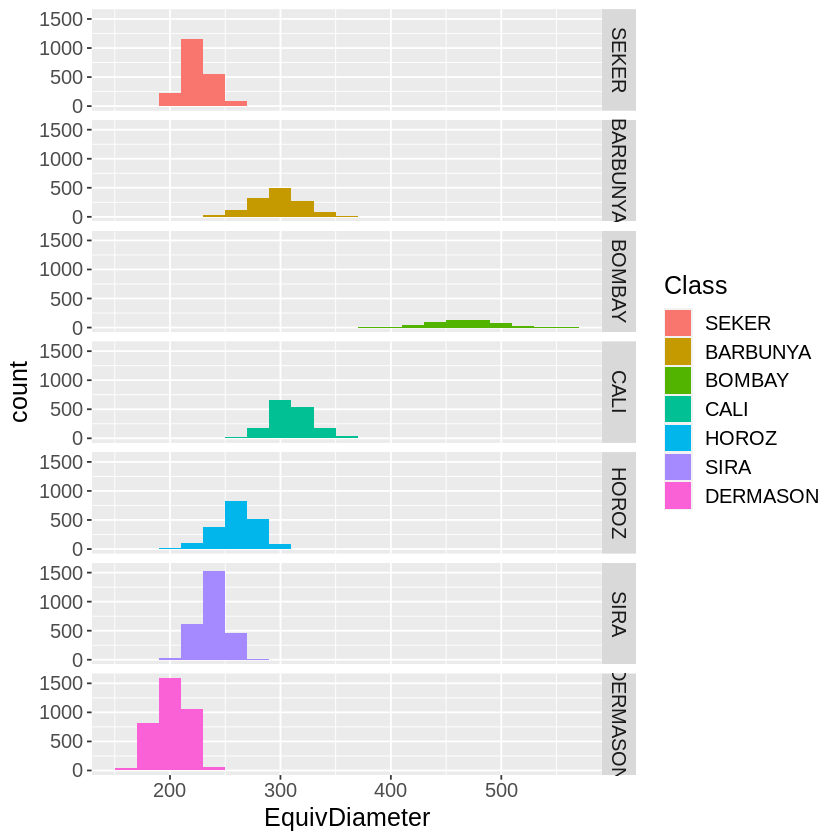

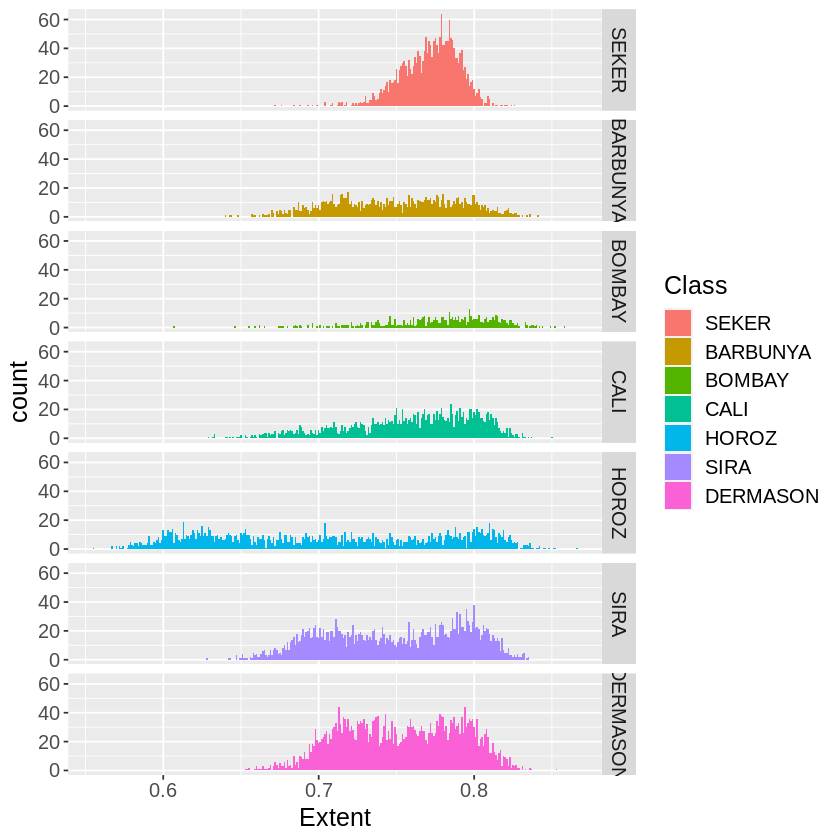

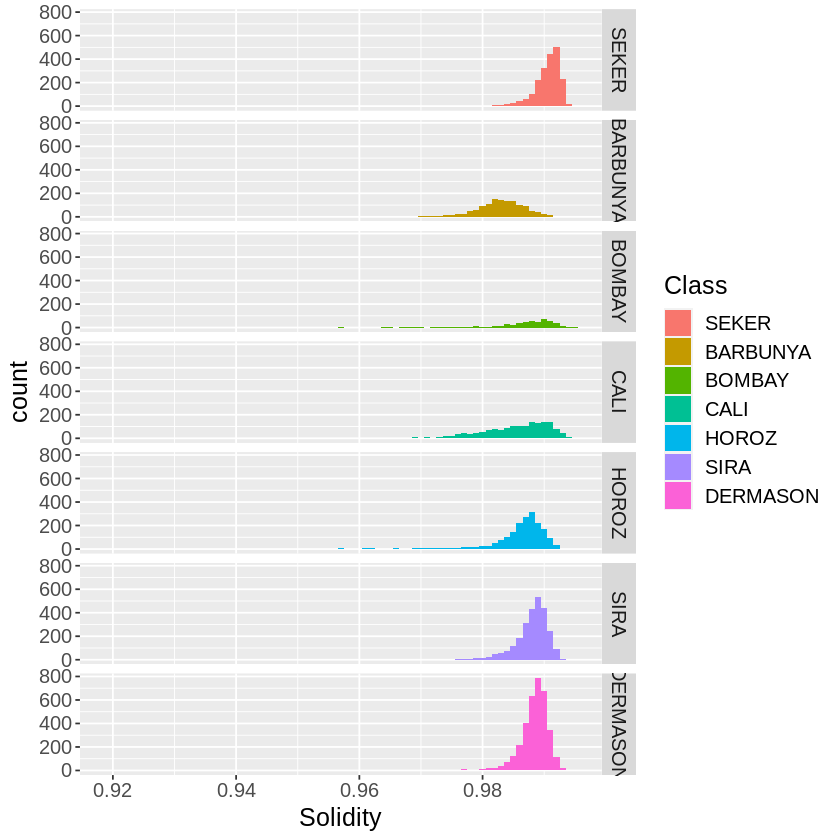

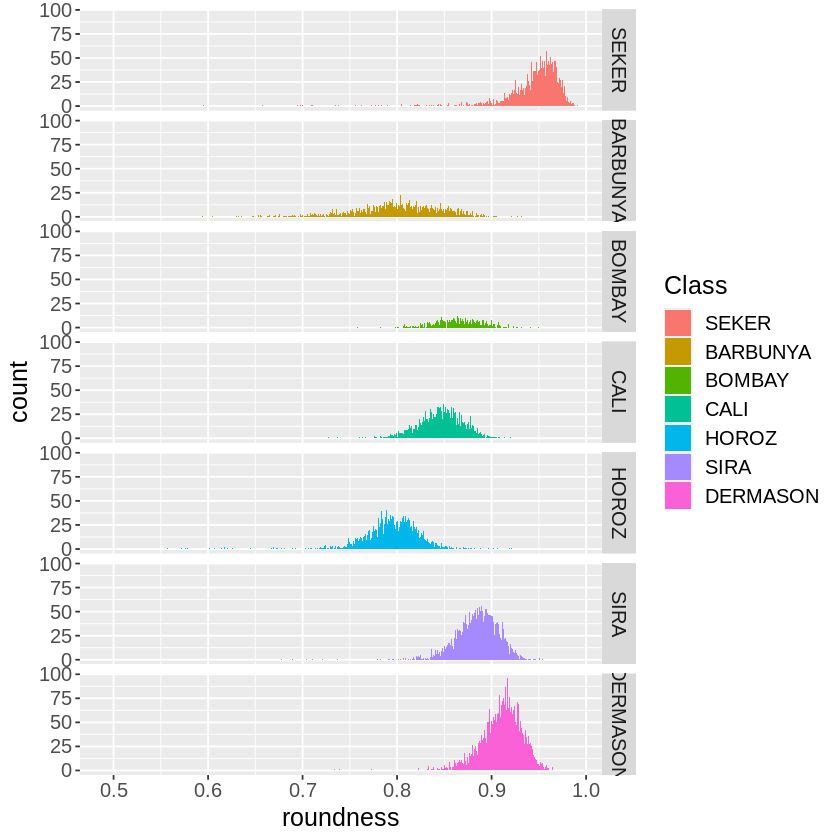

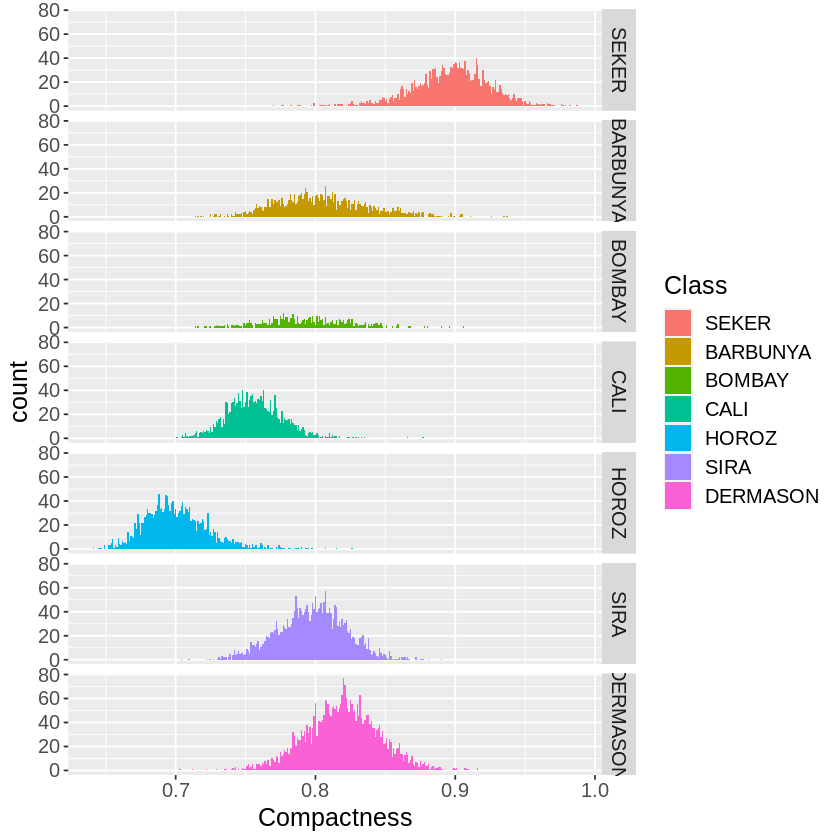

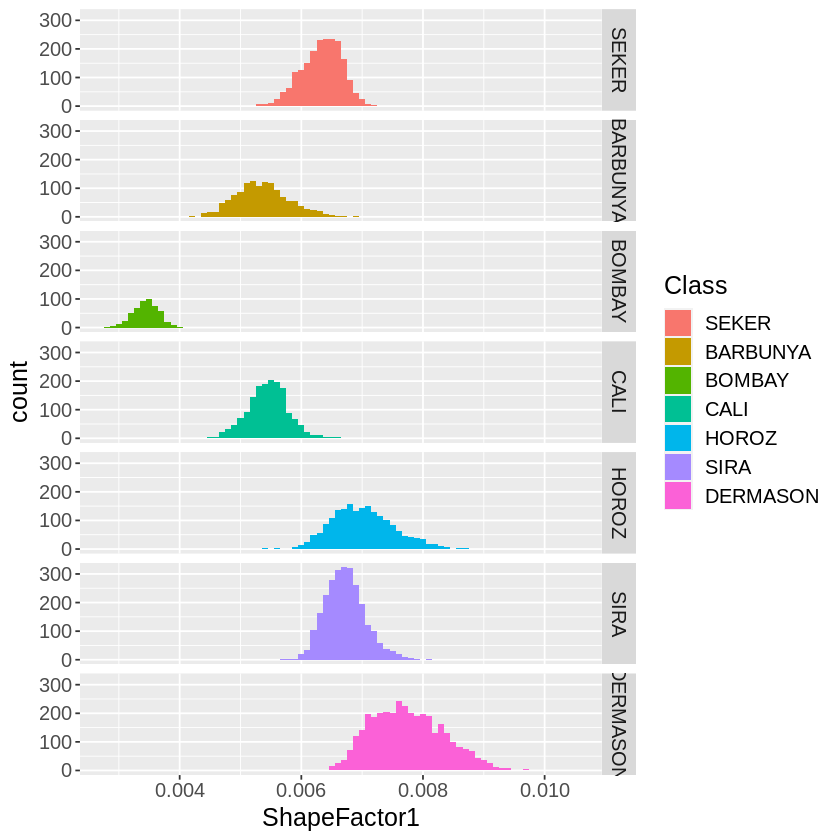

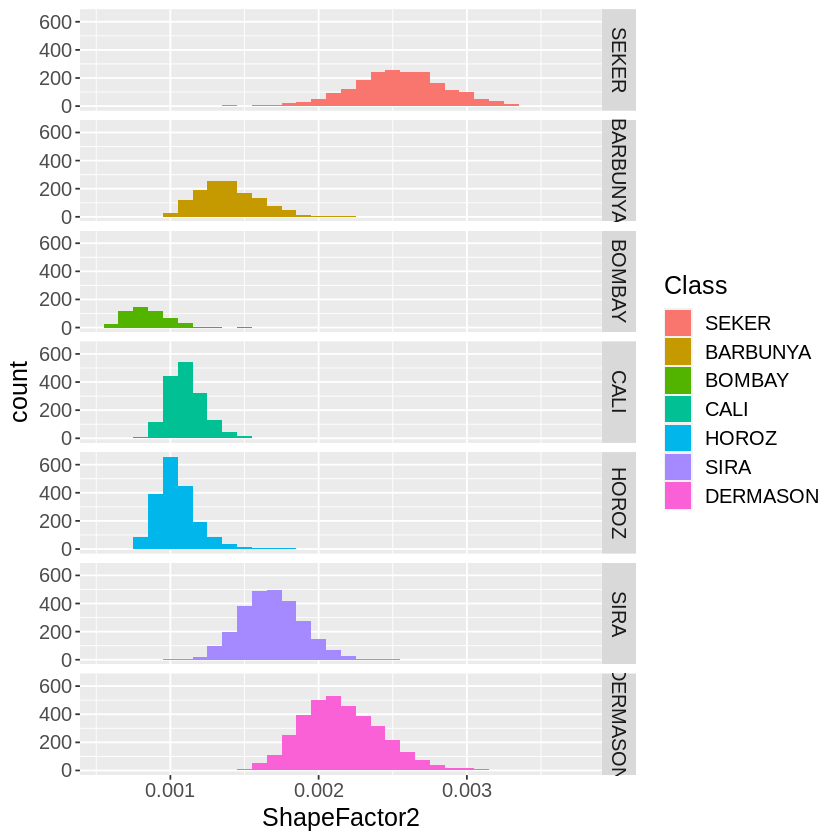

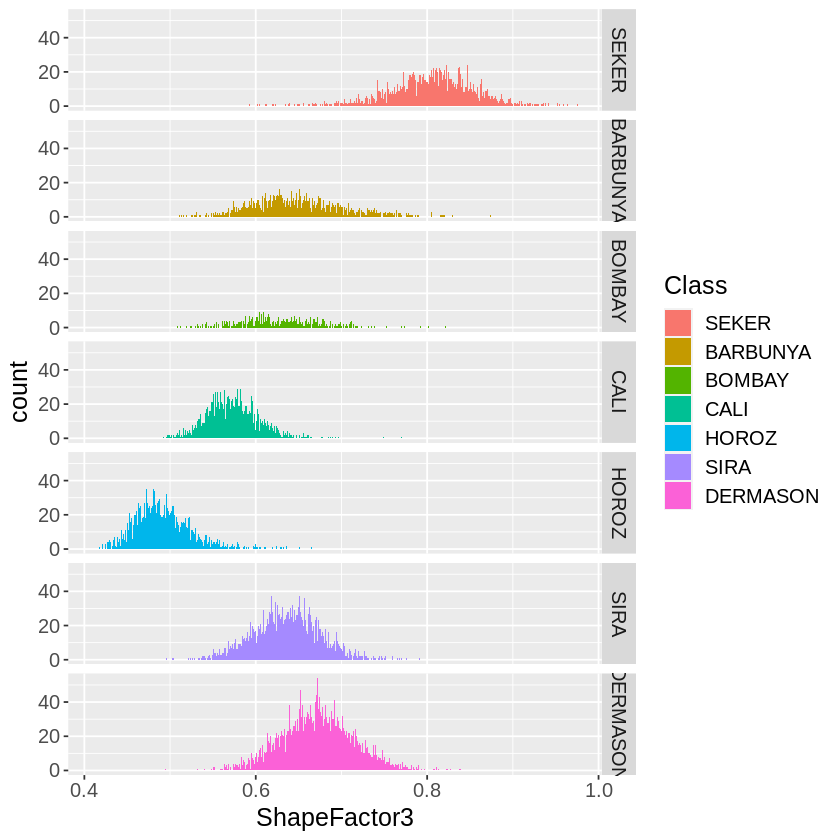

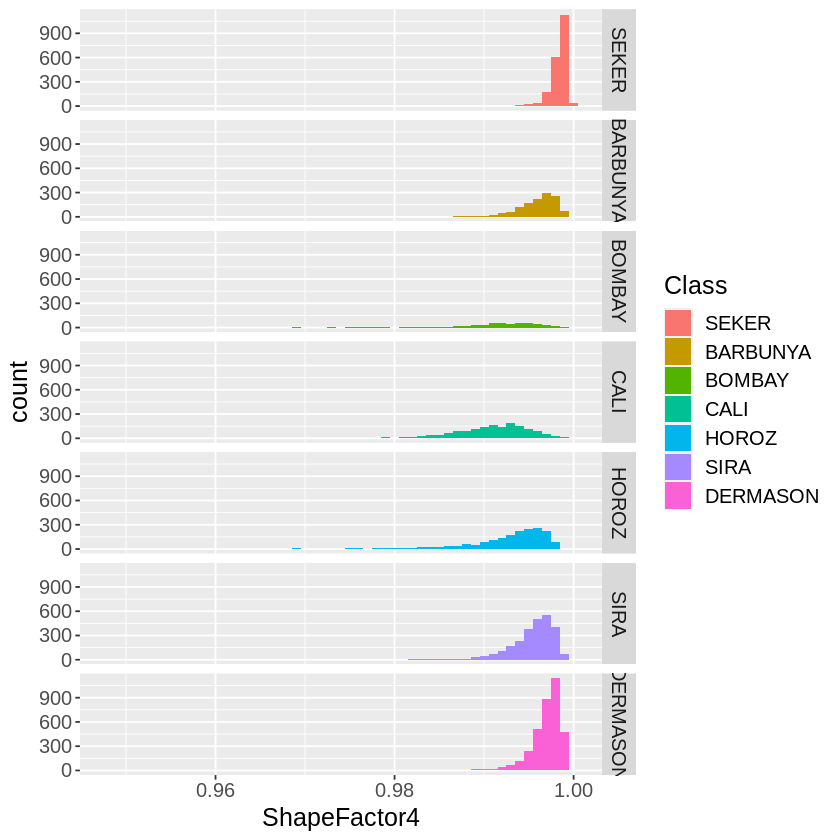

In [10]:
viz_16 <- bean_data |> 
        ggplot(aes(x= ShapeFactor4, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
        
viz_1 <- bean_data |> 
        ggplot(aes(x= Area, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_2 <- bean_data |> 
        ggplot(aes(x= Perimeter, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_3 <- bean_data |> 
        ggplot(aes(x= MajorAxisLength, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_4 <- bean_data |> 
        ggplot(aes(x= MinorAxisLength, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_5 <- bean_data |> 
        ggplot(aes(x= AspectRation, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_6 <- bean_data |> 
        ggplot(aes(x= Eccentricity, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_7 <- bean_data |> 
        ggplot(aes(x= ConvexArea, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_8 <- bean_data |> 
        ggplot(aes(x= EquivDiameter, fill = Class))+
        geom_histogram(position= "identity", binwidth = 20)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_9 <- bean_data |> 
        ggplot(aes(x= Extent, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_10 <- bean_data |> 
        ggplot(aes(x= Solidity, fill = Class))+
        geom_histogram(position= "identity",binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_11 <- bean_data |> 
        ggplot(aes(x= roundness, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_12 <- bean_data |> 
        ggplot(aes(x= Compactness, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_13 <- bean_data |> 
        ggplot(aes(x= ShapeFactor1, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.0001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_14 <- bean_data |> 
        ggplot(aes(x= ShapeFactor2, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.0001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))
viz_15 <- bean_data |> 
        ggplot(aes(x= ShapeFactor3, fill = Class))+
        geom_histogram(position= "identity", binwidth = 0.001)+
        facet_grid(rows = vars(Class))+
     theme(text = element_text(size = 15))

viz_1
viz_2 
viz_3
viz_4
viz_5
viz_6
viz_7
viz_8
viz_9
viz_10
viz_11
viz_12
viz_13 
viz_14
viz_15
viz_16

# We also specify position = "identity" in geom_histogram to ensure the histograms for each experiment will be
# overlaid side-by-side, instead of stacked bars

In [ ]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
# I DOD NOT KNOW WHAT THIS CODE IS?? WHO ADDED IT PLEASE EXPLAIN
#Preliminary exploratory data analysis:
#Create visualization to answer: can (predictor #1) and (predictor #2) be used to distinguish the dry bean types?
#goal of this visualization will be to look for patterns; since class is coloured, we can notice clusters

#Idea 1 is referencing q1.2 from classification worksheet:
options(repr.plot.width =5, repr.plot.height =3)
visualization <- ggplot(dry_bean_data, aes(x = (...), y = (...)) +
geom_point(aes(color = Class, shape = Class)) +
labs(x= "...", y= "...", color = "Type of Dry Bean") +
theme(element_text(size= 15))
# Idea 2: An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
            
# visualization <- dry_bean_data |>
#                 ggplot(aes(x= allpredictors, fill = allpredictors)) +
#                 geom_histogram(position = "identity")
#                         visualization
#          can use facet_grid here if needed and perform functions like mutate on columns where appropriate
# before making plot


###### 